<a href="https://colab.research.google.com/github/titanbender/Data-Mining/blob/master/covi19_simple_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
root_git = 'https://github.com/CSSEGISandData/COVID-19.git'

In [0]:
!git clone $root_git

fatal: destination path 'COVID-19' already exists and is not an empty directory.


In [0]:
data_dir = './COVID-19/csse_covid_19_data/csse_covid_19_time_series/'

In [0]:
!ls -alrth $data_dir

total 196K
-rw-r--r-- 1 root root    0 Mar 14 06:46 README.md
-rw-r--r-- 1 root root    9 Mar 14 06:46 .gitignore
drwxr-xr-x 4 root root 4.0K Mar 14 06:46 ..
-rw-r--r-- 1 root root  60K Mar 14 06:46 time_series_19-covid-Recovered.csv
-rw-r--r-- 1 root root  58K Mar 14 06:46 time_series_19-covid-Deaths.csv
-rw-r--r-- 1 root root  62K Mar 14 06:46 time_series_19-covid-Confirmed.csv
drwxr-xr-x 2 root root 4.0K Mar 14 06:46 .


In [0]:
import pandas
import numpy as np

rename = {'Country/Region': 'zone', 
          'Province/State': 'sub_zone'}

df_recovery = pandas.read_csv(data_dir + 'time_series_19-covid-Recovered.csv').rename(columns=rename)
df_death = pandas.read_csv(data_dir + 'time_series_19-covid-Deaths.csv').rename(columns=rename)
df_confirmed = pandas.read_csv(data_dir + 'time_series_19-covid-Confirmed.csv').rename(columns=rename)
df_confirmed.head().T.head(7).T

,sub_zone,zone,Lat,Long,1/22/20,1/23/20,1/24/20
0,NaN,Thailand,15,101,2,3,5
1,NaN,Japan,36,138,2,1,2
2,NaN,Singapore,1.2833,103.833,0,1,3
3,NaN,Nepal,28.1667,84.25,0,0,0
4,NaN,Malaysia,2.5,112.5,0,0,0


In [0]:
zones = ['France', 'Italy', 'China']
#print(df_confirmed.zone.unique())
#[sz for sz in df_confirmed.zone if sz in zones]

def clean_df(df):
  df = df.sum(axis=0)
  df = df[[d for d in df_confirmed.columns if d.find('/')>0]].T
  df.index = pandas.to_datetime(df.index)
  return df

def extract_cols(df, zones):
  dic_comp = {
      z: clean_df(df.query("zone == '{zone}'".format(zone=z))) for z in zones}
  return pandas.DataFrame(dic_comp)

df_select_conf = extract_cols(df_confirmed, zones=zones)
df_select_death = extract_cols(df_death, zones=zones)
df_select_reco = extract_cols(df_recovery, zones=zones)
df_select_conf.head()

,France,Italy,China
2020-01-22,0,0,548
2020-01-23,0,0,643
2020-01-24,2,0,920
2020-01-25,3,0,1406
2020-01-26,3,0,2075


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('dark_background')

def adjust_plots(axis):
  for ax_ in axis:
    plt.axes(ax_)
    plt.legend(fontsize=18)
    plt.grid(True, color='.5', linestyle='--', linewidth=1)
    plt.xticks(fontsize=12)  

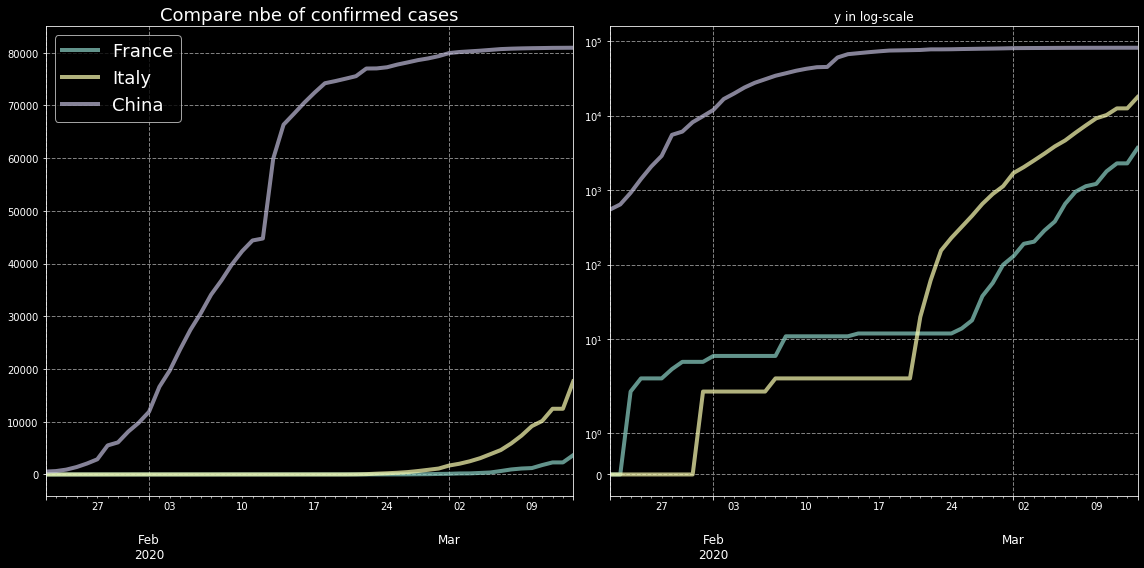

In [0]:
plt.figure(figsize=(16,8))

ax1 = plt.subplot(1, 2, 1)
plt.title('Compare nbe of confirmed cases', size=18)
ax2 = plt.subplot(1, 2, 2)
plt.yscale('symlog')
plt.title('y in log-scale')


df_select_conf.plot(ax=ax1, lw=4, alpha=.7)
df_select_conf.plot(ax=ax2, lw=4, alpha=.7)

adjust_plots([ax1, ax2])
ax2.get_legend().remove()
plt.tight_layout()

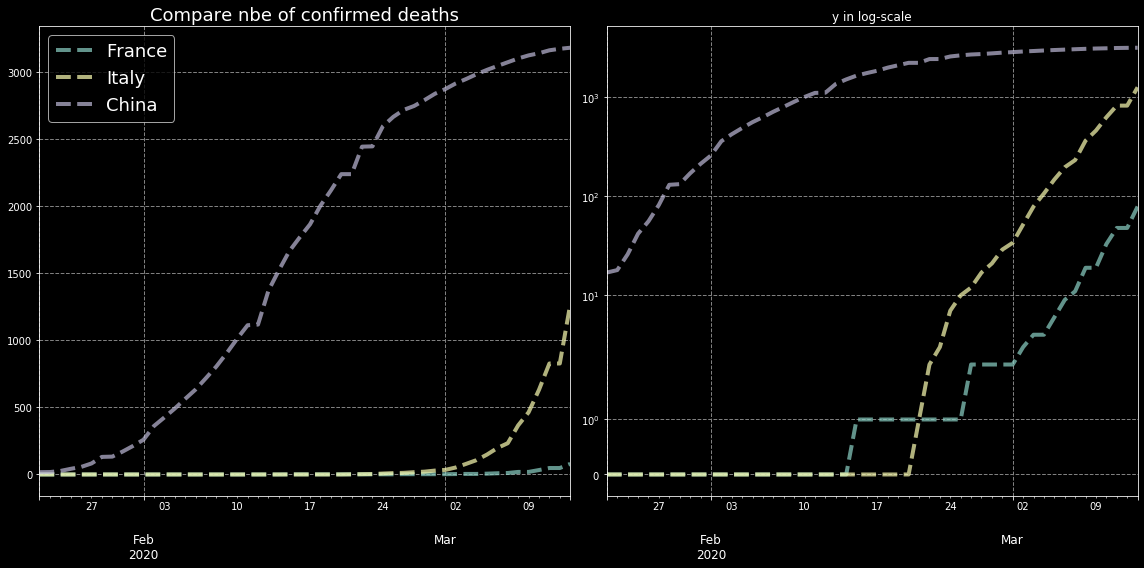

In [0]:
plt.figure(figsize=(16,8))

ax1 = plt.subplot(1, 2, 1)
plt.title('Compare nbe of confirmed deaths', size=18)
ax2 = plt.subplot(1, 2, 2)
plt.yscale('symlog')
plt.title('y in log-scale')


df_select_death.plot(ax=ax1, lw=4, alpha=.7, style='--')
df_select_death.plot(ax=ax2, lw=4, alpha=.7, style='--')

adjust_plots([ax1, ax2])
ax2.get_legend().remove()
plt.tight_layout()

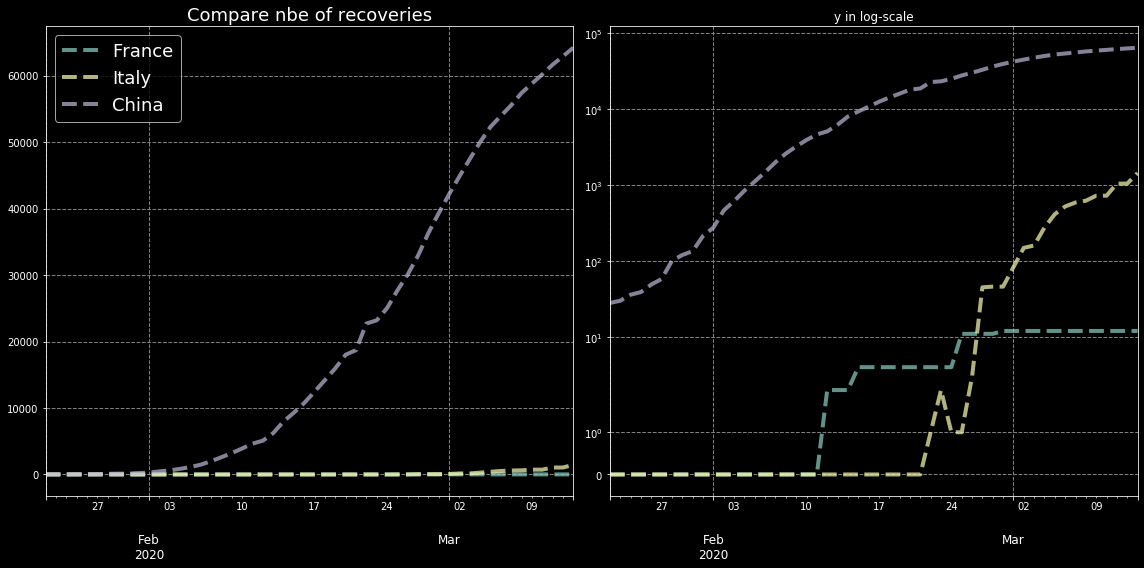

In [0]:
plt.figure(figsize=(16,8))

ax1 = plt.subplot(1, 2, 1)
plt.title('Compare nbe of recoveries', size=18)
ax2 = plt.subplot(1, 2, 2)
plt.yscale('symlog')
plt.title('y in log-scale')


df_select_reco.plot(ax=ax1, lw=4, alpha=.7, style='--')
df_select_reco.plot(ax=ax2, lw=4, alpha=.7, style='--')

adjust_plots([ax1, ax2])
ax2.get_legend().remove()
plt.tight_layout()

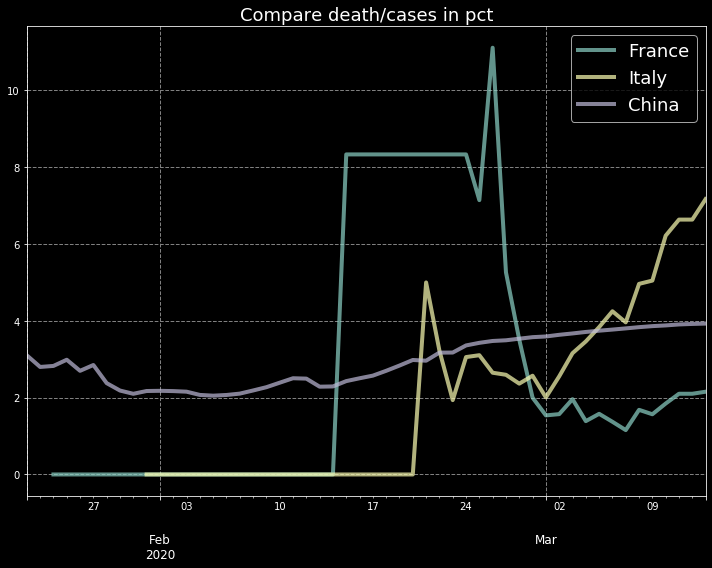

In [0]:
plt.figure(figsize=(10,8))

ax1 = plt.subplot(1, 1, 1)
plt.title('Compare death/cases in pct', size=18)

# ['03-01-2020':]
(100. * df_select_death/df_select_conf.replace(0, np.nan)).plot(ax=ax1, lw=4, alpha=.7, style='-')

adjust_plots([ax1])
plt.tight_layout()